# Video: Shapes of ROC Curves

This video discusses the shapes of ROC curves, and how they may reveal inefficiencies in your model.

## Good and Bad ROC Curves


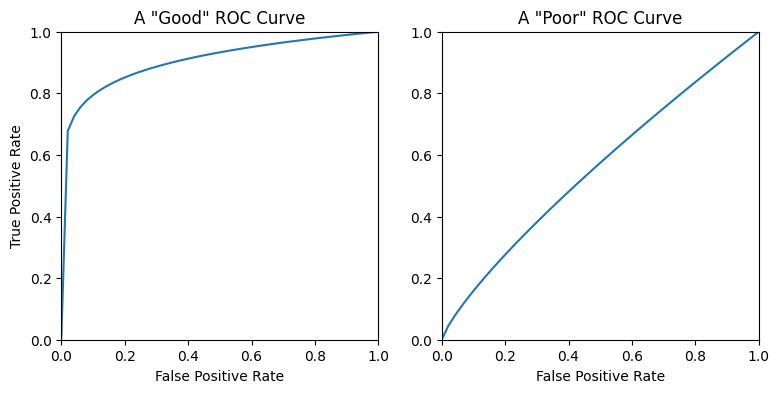

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(0, 1)

plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)

ys_good = [x**0.1 for x in xs]
plt.plot(xs, ys_good)

plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.title('A "Good" ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.subplot(1, 2, 2)

ys_bad = [x**0.8 for x in xs]
plt.plot(xs, ys_bad)

plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.title('A "Poor" ROC Curve')
plt.xlabel("False Positive Rate")

None

Script:
* If we have to make a decision based on one of these models, then the model on the left looks better, right?
* How can we quantify that?
* One way is to compute the area under the ROC curve.
* Loosely speaking, we prefer models with more area under the curve, but the area under the curve is less helpful when trying to optimize at a specific false positive rate.

## Comparable Models


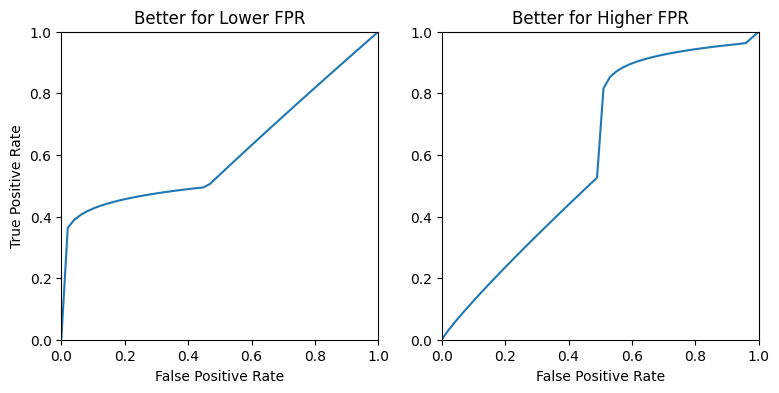

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(0, 1)

plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)

ys_left = np.max([[((x*2)**0.1)/2 if x < 0.5 else x for x in xs],
                  [x**0.9 for x in xs]],
                 axis=0)
plt.plot(xs, ys_left)

plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.title('Better for Lower FPR')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.subplot(1, 2, 2)

ys_right = np.max([[((x-0.5)**0.1)/2+0.5 if x >0.5 else x for x in xs],
                  [x**0.9 for x in xs]],
                 axis=0)
plt.plot(xs, ys_right)

plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.title('Better for Higher FPR')
plt.xlabel("False Positive Rate")

None

Script:
* Which of these models is better?
* Are we targeting low false positive rates picking on the left, or high true positive rates picking on the right?
* Can we combine the strengths of these models?

## Best of Both Worlds?


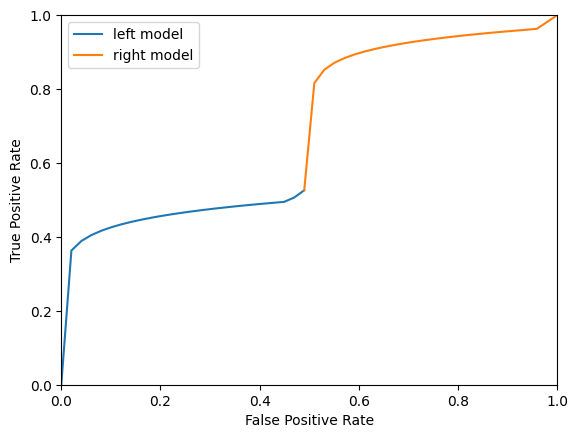

In [ ]:
plt.plot([x for (i, x) in enumerate(xs) if x <= 0.5],
         [y for (i, y) in enumerate(ys_left) if xs[i] <= 0.5],
         label="left model")
plt.plot([x for (i, x) in enumerate(xs) if x >= 0.48],
         [y for (i, y) in enumerate(ys_right) if xs[i] >= 0.48],
         label="right model")

plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

None

Script:
* The computer scientist in me wants to make a new model combining these into one model.
* Frankenstein's model if you will.
* This is not quite so easy as it sounds, since it depends on knowing the true and false probabilities by threshold well enough to know where to splice them correctly.
* And frankly, if you do a lot of this, you will get a gross mess that will be hard to debug.
* But you can get a decent approximation of this if you are working with accurate probabilities.
* Let's talk more about the shape of a good ROC curve.

## ROC Curves without Modeling


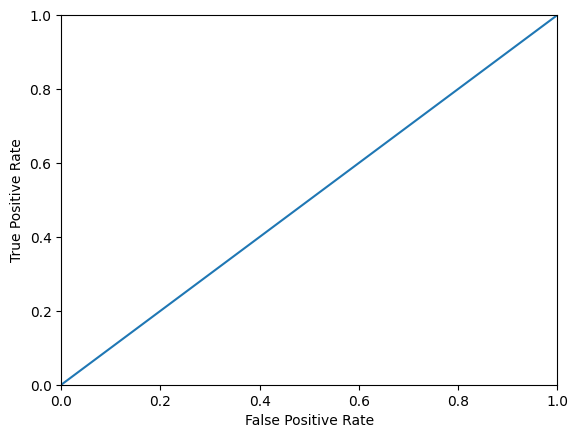

In [ ]:
plt.plot(xs, xs)

plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

None

Script:
* You can trivially make a model on this true positive rate equals false positive rate line.
* For probability p, flip a biased coin with probability p of heads, and output positive if it is heads, and negative if it is tails.
* Obviously, this is a useless model.
* But it serves as a lower bound.
* Never deploy a model that is below that line.

## Models Below the Line


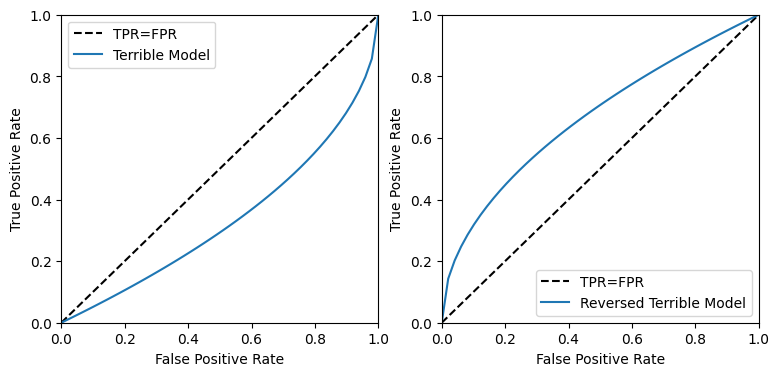

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(0, 1)

plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)

ys_reversed_bad = np.asarray([x ** 0.5 for x in xs])

plt.subplot(1, 2, 1)

plt.plot([0, 1], [0, 1], label="TPR=FPR", color="black", linestyle="--")
plt.plot(1-xs, 1 - ys_reversed_bad, label="Terrible Model")

plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.subplot(1, 2, 2)

plt.plot([0, 1], [0, 1], label="TPR=FPR", color="black", linestyle="--")
plt.plot(xs, ys_reversed_bad, label="Reversed Terrible Model")

plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

None

Script:
* If you have a model that is below that line, that is a bad scene.
* If you take that model and reverse all of its answers, then you will have a better model above the line.
* Do not deploy that model.
* You can take it as an existence proof that a better model is possible.
* But you should also take it as proof that the model that you built had something horribly wrong happen.
* Figure out what went wrong with your model, and fix it.
* If you use the flipped model in production, one day someone will fix the original model and make production worse.
* Please do not set up that trap for yourself.


## Non-Concave ROCs


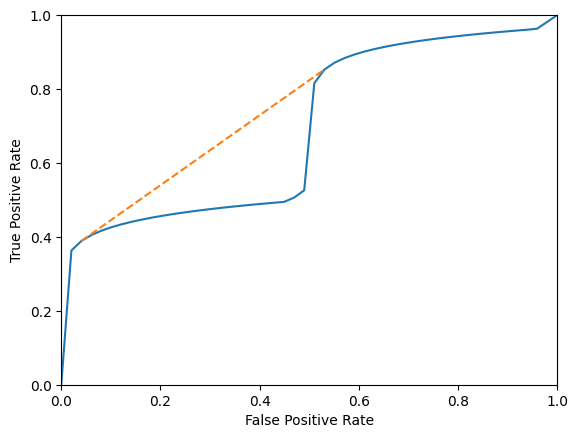

In [ ]:
plt.plot(xs, np.vstack([ys_left, ys_right]).max(axis=0), label="original model")

best_left_pair = max(zip(xs, ys_left), key = lambda r: r[1] - r[0])
best_right_pair = max(zip(xs, ys_right), key = lambda r: r[1] - r[0])
plt.plot([best_left_pair[0], best_right_pair[0]],
 [best_left_pair[1], best_right_pair[1]], label="interpolated model",
         linestyle="--")

plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

None

Script:
* In the previous video, I mentioned that you can interpolate between model points on the ROC curve.
* You may want to do it in cases like this.
* However, you should be careful interpolating, since you do not necessarily have very precise true and false positive rates.
* It may be more practical to take those dips as a hint where to look to improve your model.
* Fortunately, these cases seem to happen less often in practice, especially when you are getting all these models by thresholding another model.